3d hysplit

Epoch 0, Loss: 0.0146908825263381
Epoch 10, Loss: 0.00031047355150803924
Epoch 20, Loss: 0.0002459476236253977
Epoch 30, Loss: 0.0001259923737961799
Epoch 40, Loss: 9.063053585123271e-05
Epoch 50, Loss: 4.267499753041193e-05
Epoch 60, Loss: 8.713870556675829e-06
Epoch 70, Loss: 3.914346507372102e-06
Epoch 80, Loss: 3.712463012561784e-06
Epoch 90, Loss: 1.6830155118441326e-06


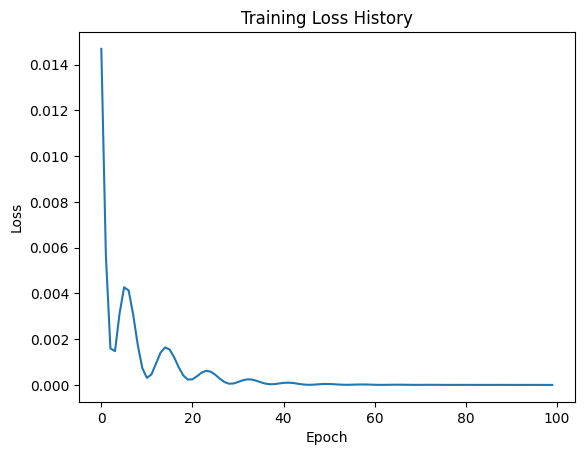

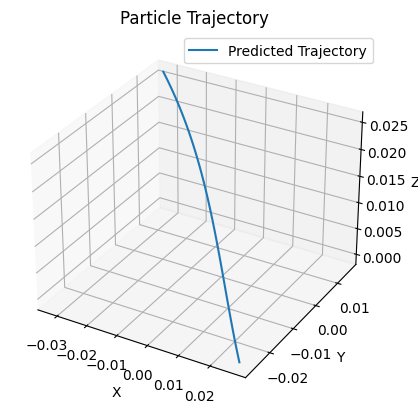

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class PINN(nn.Module):
    def __init__(self, layers):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i + 1]))
            if i < len(layers) - 2:
                self.layers.append(nn.Tanh())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

def pde_loss(model, x, y, z, t, u, v, w, D):
    x.requires_grad_(True)
    y.requires_grad_(True)
    z.requires_grad_(True)
    t.requires_grad_(True)

    output = model(torch.cat([x, y, z, t], dim=1))
    x_pred, y_pred, z_pred = torch.split(output, 1, dim=1)

    x_t = torch.autograd.grad(x_pred, t, torch.ones_like(x_pred), create_graph=True)[0]
    y_t = torch.autograd.grad(y_pred, t, torch.ones_like(y_pred), create_graph=True)[0]
    z_t = torch.autograd.grad(z_pred, t, torch.ones_like(z_pred), create_graph=True)[0]

    x_tt = torch.autograd.grad(x_t, t, torch.ones_like(x_t), create_graph=True)[0]
    y_tt = torch.autograd.grad(y_t, t, torch.ones_like(y_t), create_graph=True)[0]
    z_tt = torch.autograd.grad(z_t, t, torch.ones_like(z_t), create_graph=True)[0]

    pde_residual_x = x_tt - (u * x_t + D * x_tt)
    pde_residual_y = y_tt - (v * y_t + D * y_tt)
    pde_residual_z = z_tt - (w * z_t + D * z_tt)

    return torch.mean(pde_residual_x**2) + torch.mean(pde_residual_y**2) + torch.mean(pde_residual_z**2)

def train(model, optimizer, x, y, z, t, u, v, w, D, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = pde_loss(model, x, y, z, t, u, v, w, D)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    plt.figure()
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss History')
    plt.show()

def plot_results(model, x, y, z, t):
    with torch.no_grad():
        output = model(torch.cat([x, y, z, t], dim=1))
        x_pred, y_pred, z_pred = torch.split(output, 1, dim=1)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_pred.numpy(), y_pred.numpy(), z_pred.numpy(), label='Predicted Trajectory')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Particle Trajectory')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Define parameters
    u = 1.0  # Wind speed in x direction
    v = 1.0  # Wind speed in y direction
    w = 0.1  # Wind speed in z direction
    D = 0.01  # Diffusion coefficient

    # Generate training data
    x = torch.linspace(0, 1, 50).view(-1, 1)
    y = torch.linspace(0, 1, 50).view(-1, 1)
    z = torch.linspace(0, 1, 50).view(-1, 1)
    t = torch.linspace(0, 1, 50).view(-1, 1)

    # Initialize the PINN model
    layers = [4, 50, 50, 3]  # 4 input (x, y, z, t), two hidden layers with 50 neurons, 3 output (x, y, z)
    model = PINN(layers)

    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train(model, optimizer, x, y, z, t, u, v, w, D, epochs=100)

    # Plot results
    plot_results(model, x, y, z, t)


unedited

Epoch 0, Loss: 2.781772127491422e-05
Epoch 10, Loss: 1.636862521081639e-06
Epoch 20, Loss: 5.745417865909985e-07
Epoch 30, Loss: 4.3434376095774496e-08
Epoch 40, Loss: 9.182009108599232e-08
Epoch 50, Loss: 1.1010364175945142e-08
Epoch 60, Loss: 1.622135847867412e-08
Epoch 70, Loss: 4.856732793712126e-09
Epoch 80, Loss: 4.575916534577118e-09
Epoch 90, Loss: 2.8989259881484486e-09


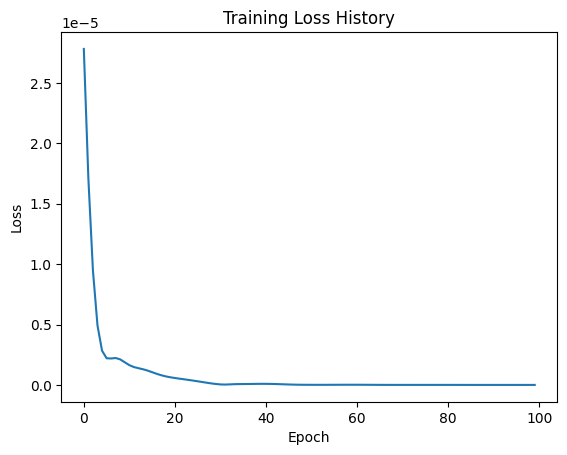

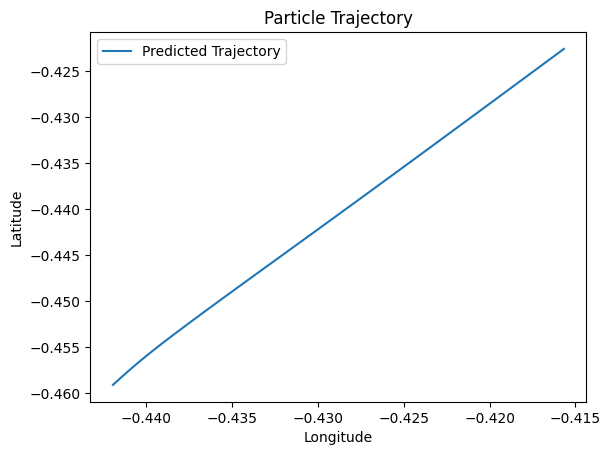

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class PINN(nn.Module):
    def __init__(self, layers):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i + 1]))
            if i < len(layers) - 2:
                self.layers.append(nn.Tanh())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

def pde_loss(model, lat, lon, t, u, v, D):
    lat.requires_grad_(True)
    lon.requires_grad_(True)
    t.requires_grad_(True)

    output = model(torch.cat([lat, lon, t], dim=1))
    lat_pred, lon_pred = torch.split(output, 1, dim=1)

    lat_t = torch.autograd.grad(lat_pred, t, torch.ones_like(lat_pred), create_graph=True)[0]
    lon_t = torch.autograd.grad(lon_pred, t, torch.ones_like(lon_pred), create_graph=True)[0]

    lat_tt = torch.autograd.grad(lat_t, t, torch.ones_like(lat_t), create_graph=True)[0]
    lon_tt = torch.autograd.grad(lon_t, t, torch.ones_like(lon_t), create_graph=True)[0]

    pde_residual_lat = lat_tt - (u * lat_t + D * lat_tt)
    pde_residual_lon = lon_tt - (v * lon_t + D * lon_tt)

    return torch.mean(pde_residual_lat**2) + torch.mean(pde_residual_lon**2)

def train(model, optimizer, lat, lon, t, u, v, D, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = pde_loss(model, lat, lon, t, u, v, D)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    plt.figure()
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss History')
    plt.show()

def plot_results(model, lat, lon, t):
    with torch.no_grad():
        output = model(torch.cat([lat, lon, t], dim=1))
        lat_pred, lon_pred = torch.split(output, 1, dim=1)

    plt.figure()
    plt.plot(lon_pred.numpy(), lat_pred.numpy(), label='Predicted Trajectory')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Particle Trajectory')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Define parameters
    u = 0.1  # Wind speed in latitude direction (degrees per hour)
    v = 0.1  # Wind speed in longitude direction (degrees per hour)
    D = 0.01  # Diffusion coefficient (degrees^2 per hour)

    # Generate training data
    lat = torch.linspace(26, 29, 50).view(-1, 1)  # Latitude range from -90 to 90 degrees
    lon = torch.linspace(76, 79, 50).view(-1, 1)  # Longitude range from -180 to 180 degrees
    t = torch.linspace(0, 24, 50).view(-1, 1)  # Time in hours, from 0 to 24 hours

    # Initialize the PINN model
    layers = [3, 50, 50, 2]  # 3 input (lat, lon, t), two hidden layers with 50 neurons, 2 output (lat, lon)
    model = PINN(layers)

    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train(model, optimizer, lat, lon, t, u, v, D, epochs=100)

    # Plot results
    plot_results(model, lat, lon, t)


original equation

Epoch 0, Loss: 0.0038481964729726315
Epoch 10, Loss: 0.00046725920401513577
Epoch 20, Loss: 0.0001892656146083027
Epoch 30, Loss: 5.5785043514333665e-05
Epoch 40, Loss: 1.587382394063752e-05
Epoch 50, Loss: 7.692691724514589e-06
Epoch 60, Loss: 4.7303392420872115e-06
Epoch 70, Loss: 2.997233195856097e-06
Epoch 80, Loss: 1.7723198197927559e-06
Epoch 90, Loss: 1.0638146932251402e-06


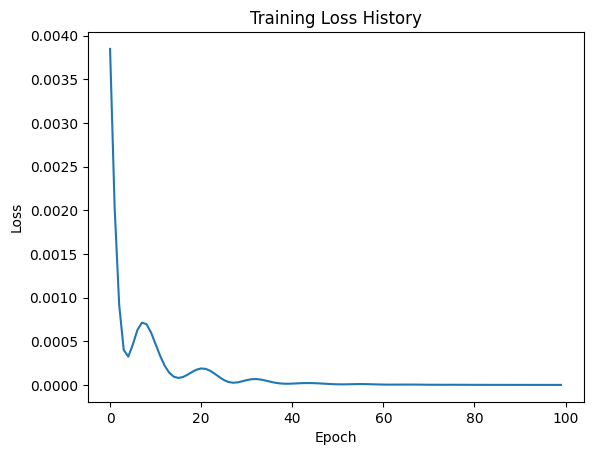

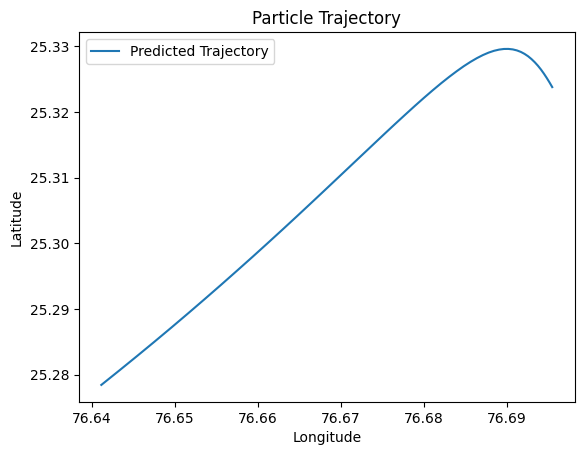

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class PINN(nn.Module):
    def __init__(self, layers):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i + 1]))
            if i < len(layers) - 2:
                self.layers.append(nn.Tanh())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

def denormalize(data, min_val, max_val):
    return data * (max_val - min_val) + min_val

def pde_loss(model, lat, lon, t, u, v, D):
    lat.requires_grad_(True)
    lon.requires_grad_(True)
    t.requires_grad_(True)

    output = model(torch.cat([lat, lon, t], dim=1))
    lat_pred, lon_pred = torch.split(output, 1, dim=1)

    lat_t = torch.autograd.grad(lat_pred, t, torch.ones_like(lat_pred), create_graph=True)[0]
    lon_t = torch.autograd.grad(lon_pred, t, torch.ones_like(lon_pred), create_graph=True)[0]

    lat_tt = torch.autograd.grad(lat_t, t, torch.ones_like(lat_t), create_graph=True)[0]
    lon_tt = torch.autograd.grad(lon_t, t, torch.ones_like(lon_t), create_graph=True)[0]

    pde_residual_lat = lat_tt - (u * lat_t + D * lat_tt)
    pde_residual_lon = lon_tt - (v * lon_t + D * lon_tt)

    return torch.mean(pde_residual_lat**2) + torch.mean(pde_residual_lon**2)

def train(model, optimizer, lat, lon, t, u, v, D, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = pde_loss(model, lat, lon, t, u, v, D)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    plt.figure()
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss History')
    plt.show()

def plot_results(model, lat, lon, t, lat_min, lat_max, lon_min, lon_max):
    with torch.no_grad():
        output = model(torch.cat([lat, lon, t], dim=1))
        lat_pred, lon_pred = torch.split(output, 1, dim=1)

    lat_pred = denormalize(lat_pred, lat_min, lat_max)
    lon_pred = denormalize(lon_pred, lon_min, lon_max)

    plt.figure()
    plt.plot(lon_pred.numpy(), lat_pred.numpy(), label='Predicted Trajectory')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Particle Trajectory')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Define parameters
    u = 0.1  # Wind speed in latitude direction (degrees per hour)
    v = 0.1  # Wind speed in longitude direction (degrees per hour)
    D = 0.01  # Diffusion coefficient (degrees^2 per hour)

    # Generate training data
    lat_min, lat_max = 25, 29
    lon_min, lon_max = 77, 80
    time_min, time_max = 0, 24

    lat = torch.linspace(lat_min, lat_max, 50).view(-1, 1)
    lon = torch.linspace(lon_min, lon_max, 50).view(-1, 1)
    t = torch.linspace(time_min, time_max, 50).view(-1, 1)

    lat = normalize(lat, lat_min, lat_max)
    lon = normalize(lon, lon_min, lon_max)
    t = normalize(t, time_min, time_max)

    # Initialize the PINN model
    layers = [3, 50, 50, 2]  # 3 input (lat, lon, t), two hidden layers with 50 neurons, 2 output (lat, lon)
    model = PINN(layers)

    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train(model, optimizer, lat, lon, t, u, v, D, epochs=100)

    # Plot results
    plot_results(model, lat, lon, t, lat_min, lat_max, lon_min, lon_max)


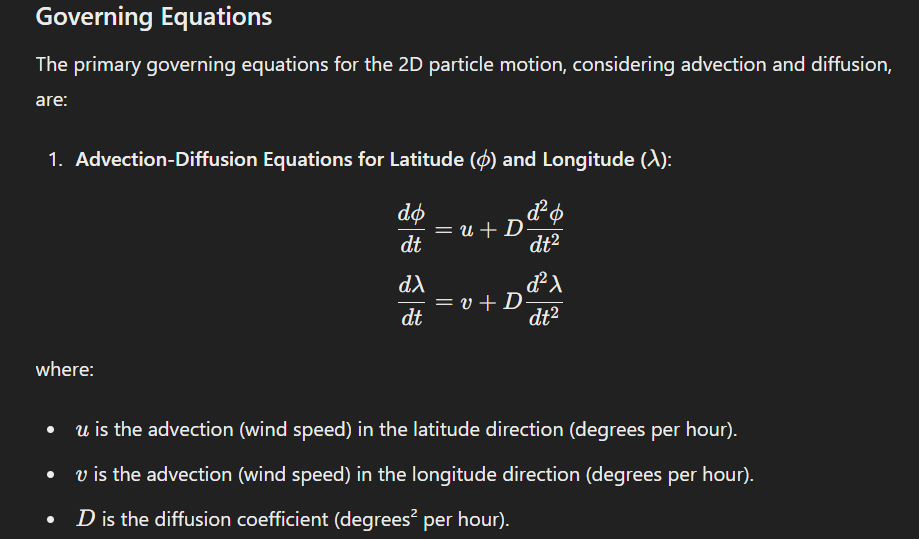

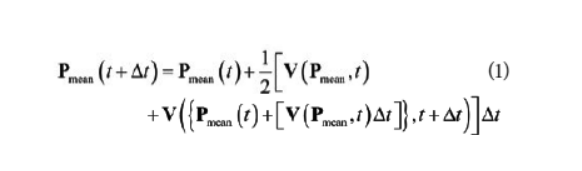

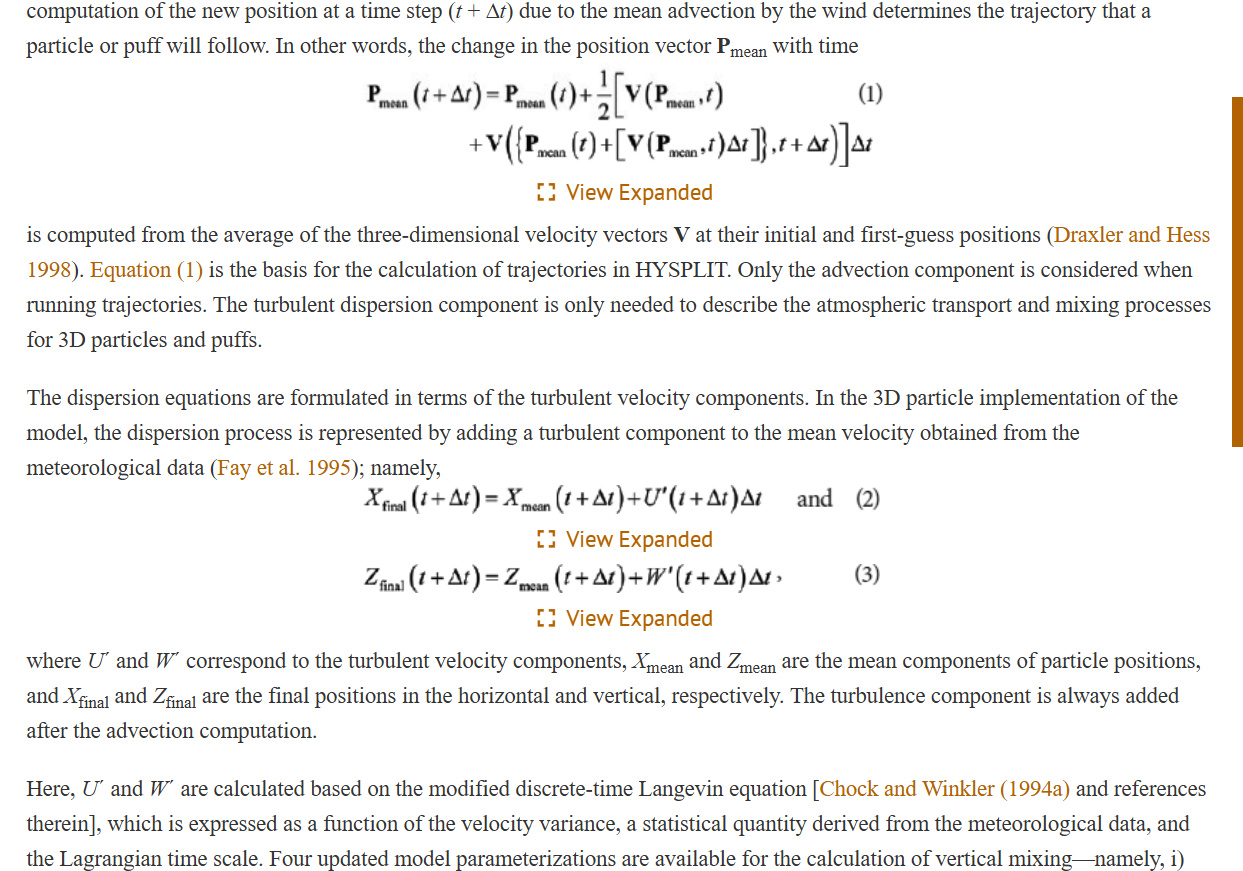

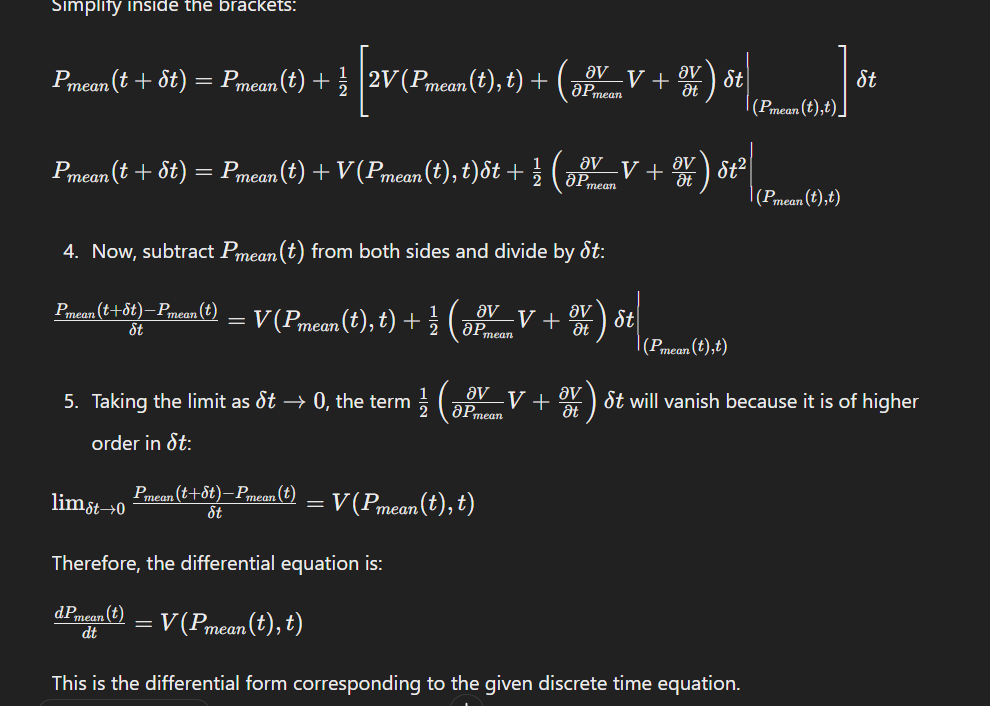

In [ ]:
# some random valued plot

Epoch 0, Loss: 0.00749253761023283
Epoch 10, Loss: 0.006686223205178976
Epoch 20, Loss: 0.0065991864539682865
Epoch 30, Loss: 0.006562400609254837
Epoch 40, Loss: 0.006527179852128029
Epoch 50, Loss: 0.0065047782845795155
Epoch 60, Loss: 0.006479697767645121
Epoch 70, Loss: 0.00645763985812664
Epoch 80, Loss: 0.0064400434494018555
Epoch 90, Loss: 0.0064280349761247635


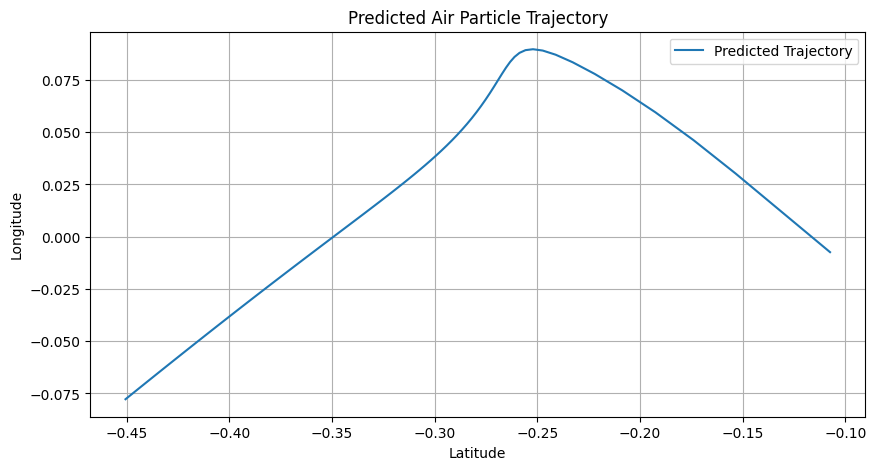

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Define the velocity field V(P, t) (dummy implementation)
def velocity_field(position, t):
    # Velocity can be a function of position and time, here we use a simple example
    # This should be replaced with the actual velocity field model or data
    u = -0.1  # constant velocity component in latitude direction
    v = 0.06   # constant velocity component in longitude direction
    return torch.tensor([u, v], dtype=torch.float32)

# Create a Physics-Informed Neural Network (PINN)
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = nn.Linear(1, 20)
        self.hidden_layer2 = nn.Linear(20, 20)
        self.output_layer = nn.Linear(20, 2)
        self.activation = nn.Tanh()

    def forward(self, t):
        x = self.activation(self.hidden_layer1(t))
        x = self.activation(self.hidden_layer2(x))
        return self.output_layer(x)

# Define the loss function based on the differential equation
def loss_function(model, t):
    t.requires_grad_(True)
    P = model(t)
    dP_dt = torch.autograd.grad(P, t, grad_outputs=torch.ones_like(P), create_graph=True)[0]
    V = torch.stack([velocity_field(P[i], t[i]) for i in range(len(P))])
    return torch.mean((dP_dt - V) ** 2)

# Training loop
def train(model, t, epochs, lr):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_function(model, t)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Initial conditions and time points
t = torch.linspace(0, 24, 100).view(-1, 1)  # 24 hours, 1000 time points
initial_position = torch.tensor([[27.75, 77.5]], dtype=torch.float32)  # Starting position

# Initialize and train the model
model = PINN()
train(model, t, epochs=100, lr=0.001)

# Predict and plot the trajectory
predicted_positions = model(t).detach().numpy()

plt.figure(figsize=(10, 5))
plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], label='Predicted Trajectory')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Predicted Air Particle Trajectory')
plt.legend()
plt.grid(True)
plt.show()


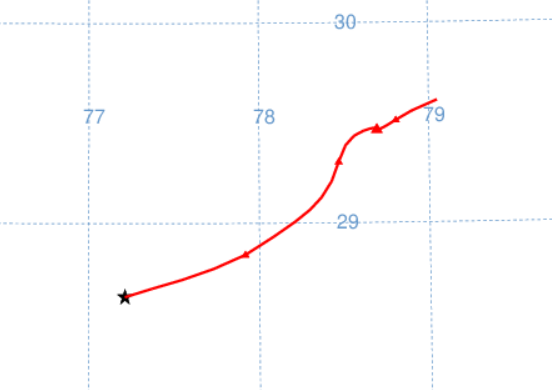

modified velocity field

edited loss

Epoch 0, Loss: 1410.6802978515625
Epoch 1000, Loss: 922.9903564453125
Epoch 2000, Loss: 599.33740234375
Epoch 3000, Loss: 441.9510498046875
Epoch 4000, Loss: 317.3733215332031
Epoch 5000, Loss: 292.5386657714844
Epoch 6000, Loss: 282.79296875
Epoch 7000, Loss: 281.18206787109375
Epoch 8000, Loss: 280.52484130859375
Epoch 9000, Loss: 279.633544921875


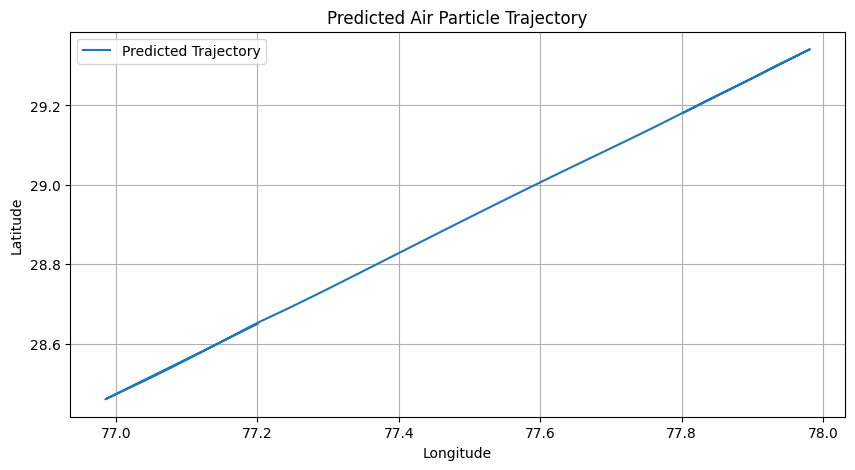

[-4.35113907e-03 -2.10138435e+01 -2.04159222e+01 -1.92154541e+01
 -1.81538525e+01 -1.70590820e+01 -1.59245796e+01 -1.47969723e+01
 -1.36897545e+01 -1.25861111e+01 -1.14655552e+01 -1.03231602e+01
 -9.17203712e+00 -8.03220177e+00 -6.91468382e+00 -5.81153917e+00
 -4.70009661e+00 -3.56297255e+00 -2.41177130e+00 -1.28497267e+00
 -2.00313091e-01  8.84771824e-01  1.99123621e+00  3.02502012e+00
  4.06064081e+00  5.51740599e+00  7.40497732e+00  9.27110100e+00
  1.10867462e+01  1.29655876e+01  1.48629742e+01  1.67260761e+01
  1.85726204e+01  2.04383354e+01  2.23299885e+01  2.42257004e+01
  2.60955753e+01  2.79177856e+01  2.96842136e+01  3.13995094e+01
  3.30775299e+01  3.47362556e+01  3.63918610e+01  3.80532761e+01
  3.97199097e+01  4.13839874e+01  4.30362549e+01  4.46731262e+01
  4.63055801e+01  4.79678040e+01  4.97092018e+01  5.15508041e+01
  5.34429550e+01  5.53163452e+01  5.71857529e+01  5.91078033e+01
  6.10363312e+01  6.29030533e+01  6.47941132e+01  6.66915207e+01
  6.84800110e+01  7.06418

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Define the velocity field V(P, t) in km/hr (dummy implementation)
def velocity_field(t):
    t = t.item()  # Convert tensor to a scalar
    if 0 <= t < 3:
        u, v = 14.5, 4.0
    elif 3 <= t < 6:
        u, v = 9.0, 9.0
    elif 6 <= t < 9:
        u, v = 21.5, 9.0
    elif 9 <= t < 12:
        u, v = 22.5, 5.0
    elif 12 <= t < 15:
        u, v = 24.0, 7.0
    elif 15 <= t < 18:
        u, v = 4.0, 3.33
    elif 18 <= t < 21:
        u, v = -8.0, -4.0
    elif 21 <= t <= 24:
        u, v = -4.0, -8.0
    else:
        u, v = 0.0, 0.0  # Default value, in case t is out of expected range
    return torch.tensor([u, v], dtype=torch.float32)


# Create a Physics-Informed Neural Network (PINN)
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = nn.Linear(1, 20)
        self.hidden_layer2 = nn.Linear(20, 20)
        self.output_layer = nn.Linear(20, 2)
        self.activation = nn.Tanh()

    def forward(self, t):
        x = self.activation(self.hidden_layer1(t))
        x = self.activation(self.hidden_layer2(x))
        return self.output_layer(x)

t_boundary= torch. tensor (0.). view (-1, 1).requires_grad_(True)

# Define the loss function based on the differential equation
def loss_function(model, t):

    P = model(t)
    dP_dt = torch.autograd.grad(P, t, grad_outputs=torch.ones_like(P), create_graph=True)[0]
    #V = torch.stack([velocity_field(P[i], t[i]) for i in range(len(P))])
    V = torch.stack([velocity_field(ti) for ti in t])
    loss1 = torch.mean((dP_dt - V) ** 2)
    u = model(t_boundary)
    loss2 = (u[:,0])**2+(u[:,1])**2
    return 10*loss1+loss2

# Training loop
def train(model, t, epochs, lr):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_function(model, t)
        loss.backward()
        optimizer.step()
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Initial conditions and time points
t = torch.linspace(0, 24, 100).view(-1, 1).requires_grad_(True)  # 24 hours, 1000 time points

# Initialize and train the model
model = PINN()
train(model, t, epochs=10000, lr=0.001)

# Predict and plot the trajectory
predicted_positions = model(t).detach().numpy()

# Convert predicted displacement to latitude and longitude changes
initial_latitude = 28.65
initial_longitude = 77.2
km_to_deg_lat = 1 / 111.0  # Approx conversion factor from km to degrees latitude
km_to_deg_lon = 1 / (111.0 * np.cos(np.radians(initial_latitude)))  # Approx conversion factor from km to degrees longitude

latitudes = initial_latitude + predicted_positions[:, 0] * km_to_deg_lat
longitudes = initial_longitude + predicted_positions[:, 1] * km_to_deg_lon

plt.figure(figsize=(10, 5))
plt.plot(longitudes, latitudes, label='Predicted Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Air Particle Trajectory')
plt.legend()
plt.grid(True)
plt.show()
print(predicted_positions[:,0])


Epoch 0, Loss: 0.06362259387969971
Epoch 500, Loss: 9.714228326629382e-06
Epoch 1000, Loss: 5.799809514428489e-06
Epoch 1500, Loss: 4.772464762936579e-06
Epoch 2000, Loss: 4.164409347140463e-06
Epoch 2500, Loss: 3.70741054211976e-06
Epoch 3000, Loss: 3.3566270758456085e-06
Epoch 3500, Loss: 3.077313522226177e-06
Epoch 4000, Loss: 2.862845121853752e-06
Epoch 4500, Loss: 2.8664430828939658e-06


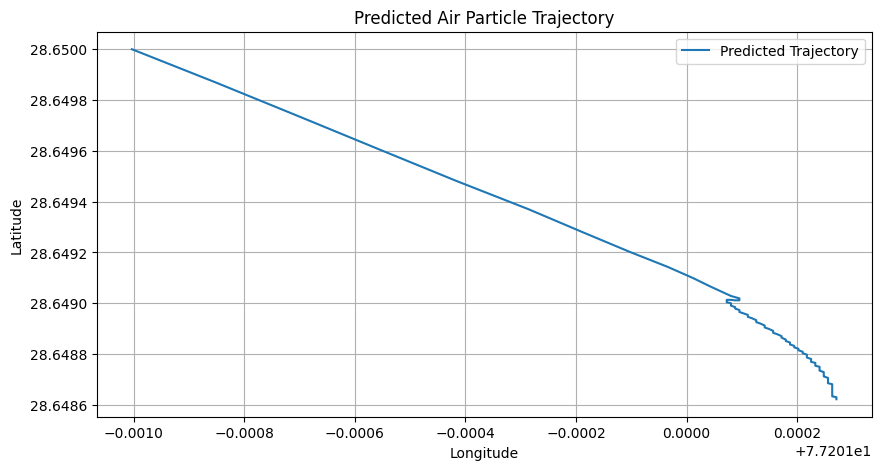

[ 5.96307218e-05 -1.46940481e-02 -2.95366868e-02 -4.40525115e-02
 -5.76496385e-02 -6.97717592e-02 -8.00688341e-02 -8.84415656e-02
 -9.49901789e-02 -9.99326408e-02 -1.03533298e-01 -1.06056958e-01
 -1.07744649e-01 -1.08804032e-01 -1.09407276e-01 -1.09693751e-01
 -1.09773517e-01 -1.09731495e-01 -1.09632105e-01 -1.09522387e-01
 -1.09436110e-01 -1.09396234e-01 -1.09417394e-01 -1.09508023e-01
 -1.09671876e-01 -1.09909102e-01 -1.10217527e-01 -1.10593215e-01
 -1.11031324e-01 -1.11526251e-01 -1.12072051e-01 -1.12662852e-01
 -1.13292903e-01 -1.13956451e-01 -1.14648372e-01 -1.15363821e-01
 -1.16098195e-01 -1.16847485e-01 -1.17607921e-01 -1.18376315e-01
 -1.19149670e-01 -1.19925454e-01 -1.20701373e-01 -1.21475458e-01
 -1.22246146e-01 -1.23011962e-01 -1.23771653e-01 -1.24524236e-01
 -1.25268966e-01 -1.26005173e-01 -1.26732275e-01 -1.27450049e-01
 -1.28158048e-01 -1.28856242e-01 -1.29544452e-01 -1.30222723e-01
 -1.30890965e-01 -1.31549433e-01 -1.32198185e-01 -1.32837296e-01
 -1.33467123e-01 -1.34087

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)


def velocity_field(p, t):
    t = t.item()  # Convert tensor to a scalar
    lat, lon = p[0].item(), p[1].item()  # Extract latitude and longitude from the tensor

    # Define the sinusoidal variation
    u_amplitude = torch.tensor(5.0)  # Amplitude for u component
    v_amplitude = torch.tensor(3.0)  # Amplitude for v component
    u_frequency = torch.tensor(0.1)  # Frequency for u component
    v_frequency = torch.tensor(0.2)  # Frequency for v component

    # Calculate the velocity components using sine functions
    u = u_amplitude * torch.sin(u_frequency * lat) * torch.sin(u_frequency * lon)
    v = v_amplitude * torch.sin(v_frequency * lat) * torch.sin(v_frequency * lon)

    return torch.tensor([u, v], dtype=torch.float32)




# Create a Physics-Informed Neural Network (PINN)
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = nn.Linear(1, 20)
        self.hidden_layer2 = nn.Linear(20, 20)
        self.output_layer = nn.Linear(20, 2)
        self.activation = nn.Tanh()

    def forward(self, t):
        x = self.activation(self.hidden_layer1(t))
        x = self.activation(self.hidden_layer2(x))
        return self.output_layer(x)

t_boundary= torch. tensor (0.). view (-1, 1).requires_grad_(True)

# Define the loss function based on the differential equation
def loss_function(model, t):

    P = model(t)
    dP_dt = torch.autograd.grad(P, t, grad_outputs=torch.ones_like(P), create_graph=True)[0]
    V = torch.stack([velocity_field(P[i], t[i]) for i in range(len(P))])
    #V = torch.stack([velocity_field(ti) for ti in t])
    loss1 = torch.mean((dP_dt - V) ** 2)
    u = model(t_boundary)
    loss2 = (u[:,0])**2+(u[:,1])**2
    return 10*loss1+loss2

# Training loop
def train(model, t, epochs, lr):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_function(model, t)
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Initial conditions and time points
t = torch.linspace(0, 24, 100).view(-1, 1).requires_grad_(True)  # 24 hours, 1000 time points

# Initialize and train the model
model = PINN()
train(model, t, epochs=5000, lr=0.001)

# Predict and plot the trajectory
predicted_positions = model(t).detach().numpy()

# Convert predicted displacement to latitude and longitude changes
initial_latitude = 28.65
initial_longitude = 77.2
km_to_deg_lat = 1 / 111.0  # Approx conversion factor from km to degrees latitude
km_to_deg_lon = 1 / (111.0 * np.cos(np.radians(initial_latitude)))  # Approx conversion factor from km to degrees longitude

latitudes = initial_latitude + predicted_positions[:, 0] * km_to_deg_lat
longitudes = initial_longitude + predicted_positions[:, 1] * km_to_deg_lon

plt.figure(figsize=(10, 5))
plt.plot(longitudes, latitudes, label='Predicted Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Air Particle Trajectory')
plt.legend()
plt.grid(True)
plt.show()
print(predicted_positions[:,0])
print(predicted_positions.shape)

Epoch 0, Loss: 349.0468444824219
Epoch 1000, Loss: 135.2757568359375
Epoch 2000, Loss: 97.19564819335938
Epoch 3000, Loss: 96.8203353881836
Epoch 4000, Loss: 96.83795166015625
Epoch 5000, Loss: 96.83708190917969
Epoch 6000, Loss: 96.82743072509766
Epoch 7000, Loss: 96.81465148925781
Epoch 8000, Loss: 96.79930114746094
Epoch 9000, Loss: 96.783447265625
Epoch 10000, Loss: 96.76834106445312
Epoch 11000, Loss: 96.74164581298828
Epoch 12000, Loss: 96.71649932861328
Epoch 13000, Loss: 96.68759155273438
Epoch 14000, Loss: 96.645751953125
Epoch 15000, Loss: 96.59884643554688
Epoch 16000, Loss: 96.5518798828125
Epoch 17000, Loss: 96.5079574584961
Epoch 18000, Loss: 96.465576171875
Epoch 19000, Loss: 96.42871856689453


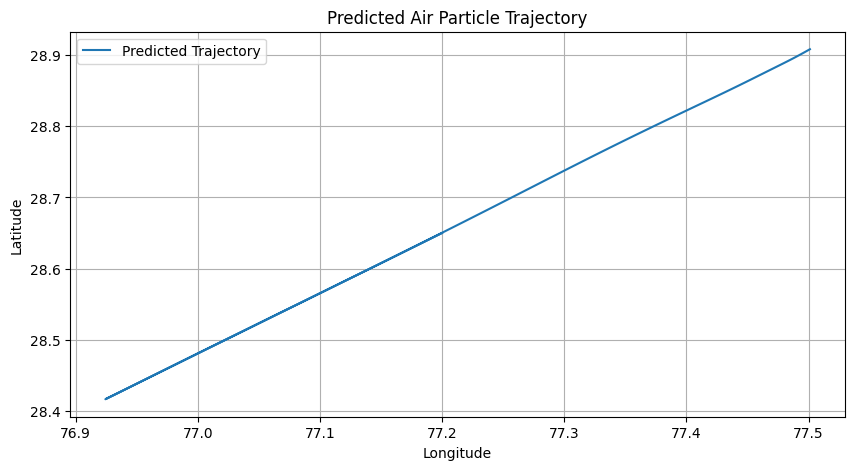

[-2.8973520e-03 -2.5719379e+01 -2.5884455e+01 -2.5256178e+01
 -2.4693335e+01 -2.4112900e+01 -2.3523724e+01 -2.2925980e+01
 -2.2321331e+01 -2.1711288e+01 -2.1096588e+01 -2.0477797e+01
 -1.9855625e+01 -1.9230888e+01 -1.8604359e+01 -1.7976671e+01
 -1.7348316e+01 -1.6719675e+01 -1.6091057e+01 -1.5462725e+01
 -1.4834904e+01 -1.4207764e+01 -1.3581408e+01 -1.2955879e+01
 -1.2331150e+01 -1.1707119e+01 -1.1083635e+01 -1.0460484e+01
 -9.8374186e+00 -9.2141600e+00 -8.5903912e+00 -7.9657879e+00
 -7.3399944e+00 -6.7126460e+00 -6.0833549e+00 -5.4517250e+00
 -4.8173599e+00 -4.1798415e+00 -3.5387576e+00 -2.8937047e+00
 -2.2442849e+00 -1.5901253e+00 -9.3087602e-01 -2.6622543e-01
  4.0408421e-01  1.0802701e+00  1.7624828e+00  2.4508040e+00
  3.1452403e+00  3.8457143e+00  4.5520482e+00  5.2639494e+00
  5.9809976e+00  6.7026253e+00  7.4281149e+00  8.1565809e+00
  8.8869982e+00  9.6182137e+00  1.0348967e+01  1.1077926e+01
  1.1803710e+01  1.2524911e+01  1.3240117e+01  1.3947917e+01
  1.4646954e+01  1.53359

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Define a more complex velocity field V(P, t) in km/hr
def velocity_field(P, t):
    t = t.item()  # Convert tensor to a scalar
    x, y = P.detach().numpy()  # Position coordinates

    u = 10 * np.sin(0.1 * t) + 0.1 * x * np.cos(0.1 * y)
    v = 5 * np.cos(0.1 * t) + 0.1 * y * np.sin(0.1 * x)

    return torch.tensor([u, v], dtype=torch.float32)

# Create a Physics-Informed Neural Network (PINN)
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = nn.Linear(1, 40)
        self.hidden_layer2 = nn.Linear(40, 40)
        self.hidden_layer3 = nn.Linear(40, 40)
        self.output_layer = nn.Linear(40, 2)
        self.activation = nn.Tanh()

    def forward(self, t):
        x = self.activation(self.hidden_layer1(t))
        x = self.activation(self.hidden_layer2(x))
        x = self.activation(self.hidden_layer3(x))
        return self.output_layer(x)

t_boundary = torch.tensor(0.).view(-1, 1).requires_grad_(True)

# Define the loss function based on the differential equation
def loss_function(model, t):
    P = model(t)
    dP_dt = torch.autograd.grad(P, t, grad_outputs=torch.ones_like(P), create_graph=True)[0]
    V = torch.stack([velocity_field(P[i], t[i]) for i in range(len(P))])
    loss1 = torch.mean((dP_dt - V) ** 2)
    u = model(t_boundary)
    loss2 = (u[:,0])**2+(u[:,1])**2
    return 10 * loss1 + loss2

# Training loop
def train(model, t, epochs, lr):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_function(model, t)
        loss.backward()
        optimizer.step()
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Initial conditions and time points
t = torch.linspace(0, 24, 100).view(-1, 1).requires_grad_(True)  # 24 hours, 100 time points

# Initialize and train the model
model = PINN()
train(model, t, epochs=20000, lr=0.0005)  # Increased epochs and decreased learning rate

# Predict and plot the trajectory
predicted_positions = model(t).detach().numpy()

# Convert predicted displacement to latitude and longitude changes
initial_latitude = 28.65
initial_longitude = 77.2
km_to_deg_lat = 1 / 111.0  # Approx conversion factor from km to degrees latitude
km_to_deg_lon = 1 / (111.0 * np.cos(np.radians(initial_latitude)))  # Approx conversion factor from km to degrees longitude

latitudes = initial_latitude + predicted_positions[:, 0] * km_to_deg_lat
longitudes = initial_longitude + predicted_positions[:, 1] * km_to_deg_lon

plt.figure(figsize=(10, 5))
plt.plot(longitudes, latitudes, label='Predicted Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Air Particle Trajectory')
plt.legend()
plt.grid(True)
plt.show()
print(predicted_positions[:, 0])


predicting step by step

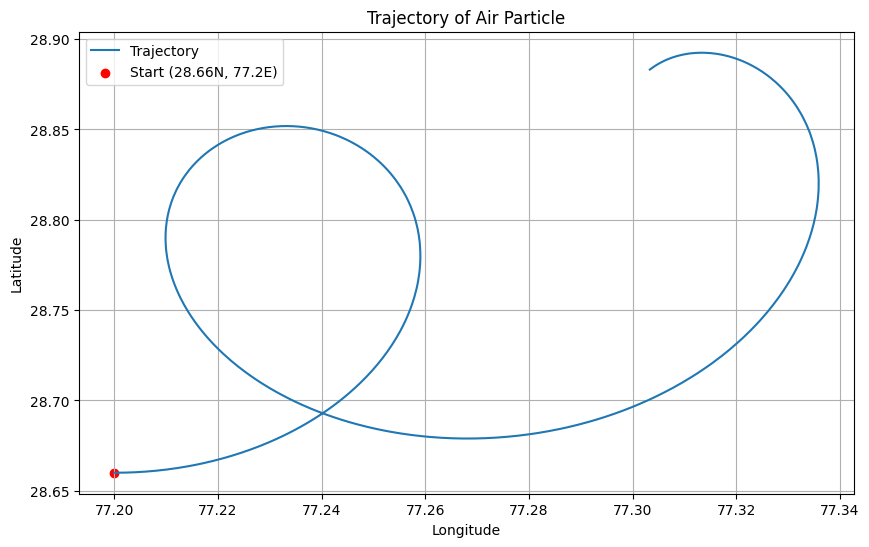

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


class VelocityFunction(nn.Module):
    def __init__(self):
        super(VelocityFunction, self).__init__()

    def forward(self, position, time):
        vx = 10 * torch.sin(time) + 0.1 * position[:, 1]
        vy = 5 * torch.cos(time) + 0.1 * position[:, 0]
        return torch.stack((vx, vy), dim=1)


initial_position = torch.tensor([[0.0, 0.0]])  # Position in km
initial_time = 0.0
final_time = 10.0  # hours
num_steps = 1000
time_points = torch.linspace(initial_time, final_time, num_steps)

velocity_function = VelocityFunction()

# Integrate using Euler's method
positions = [initial_position]
current_position = initial_position
dt = (final_time - initial_time) / num_steps

for t in time_points[:-1]:
    current_velocity = velocity_function(current_position, t)
    next_position = current_position + current_velocity * dt
    positions.append(next_position)
    current_position = next_position

positions = torch.stack(positions).squeeze().detach().numpy()

# Convert km to degrees
lat0 = 28.66  # Initial latitude
lon0 = 77.2   # Initial longitude
km_to_deg_lat = 1 / 111  # 1 degree latitude is approximately 111 km
km_to_deg_lon = 1 / (111 * np.cos(np.deg2rad(lat0)))  # Adjust for latitude

latitudes = lat0 + positions[:, 0] * km_to_deg_lat
longitudes = lon0 + positions[:, 1] * km_to_deg_lon

# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(longitudes, latitudes, label='Trajectory')
plt.scatter([lon0], [lat0], color='red', label='Start (28.66N, 77.2E)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Trajectory of Air Particle')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install pysplit

In [ ]:
"""
=====================
Trajectory Generation
=====================

PySPLIT includes a method that calls HYSPLIT to generate trajectories
launched from a single location over as many months and years as desired in
a single comprehensive batch.


Requirements
------------

HYSPLIT installation
~~~~~~~~~~~~~~~~~~~~

Unlike the majority of PySPLIT, this feature requires a local installation
of HYSPLIT, which can be acquired from the NOAA ARL
here<http://ready.arl.noaa.gov/HYSPLIT.php>_.

The location of the `hyts_std` executable must be known.

Meteorology
~~~~~~~~~~~

This example uses the following GDAS files, freely available from the ARL:
* Weeks 1 - 5 of:
  * January 2007
  * August 2007
  * January 2011
  * August 2011
* Weeks 4 and 5 of:
  * December 2006
  * July 2007
  * December 2010
  * July 2011
* Week 1 of:
  * February 2007
  * September 2007
  * February 2011
  * September 2011

As GDAS files are in 3 hour intervals, the very last trajectories in January
and August will not generate properly without the third group of weeks.
As a general principle, meteorology data sets corresponding to the desired time
and geospatial extent must be available to successfully generate trajectories.
These data sets must be in the ARL-packed format.  All meteorology downloaded
through the HYSPLIT ARL data FTP is already in this format, and HYSPLIT
contains some utilities to convert other file types to this format.
Acquistion of appropriate files and the nature of
the ARL-packed format and conversion is beyond the scope of this example,
and for more information consult the official `User's
Guide<http://www.arl.noaa.gov/documents/reports/hysplit_user_guide.pdf`_
if necessary before proceeding.

Prior to attempting trajectory generation with PySPLIT, the user should ensure
that meteorology file names follow a format of '*mon*YY*#' or '*mon*YYYY*#' where:

* '*' is a Bash-style wildcard
* 'mon' is a three-letter lower-case abbreviation of the month
* 'YY' or 'YYYY' is a two or four digit integer representation of the year
* '#' is the number of the file within the month

For example, '*jan*07*2' will match files named 'gdas1.jan2007.w2' and
'edas.jan2007_2'.

This naming convention is required because PySPLIT examines file names to
determine which meteorology files correspond to the desired date of
trajectory launch.  It is strongly recommended that users keep meteorology
files of different types/origins, like the two files in the example above,
in separate directories as PySPLIT does not differentiate between the two.

Output along-trajectory meteorology variables may be selected by interacting
with HYSPLIT.


Generating Trajectories
-----------------------

As always, we begin by importing the package.
"""

import pysplit

"""
For clarity, we will define all required arguments outside of the method.

The first three arguments indicate locations of the HYSPLIT working directory,
the desired and existing trajectory storage directory, and the directory
that contains the meteorology files.  This example uses 1-degree weekly
GDAS archive meteorology downloaded via FTP.
"""

working_dir = r'"C:\Users\Support\Downloads\extract_24756"'
storage_dir = r'C:/trajectories/colgate'
meteo_dir = r'E:/gdas'

"""
The next argument is the basename of each trajectory.  Each trajectory
filename will consist of this basename followed by the altitude and season,
and then the year, month, day, and hour in the format YYYYMMDDHH (unless
otherwise specified as YYMMDDHH)..
"""

basename = 'colgate'

"""
The following arguments are the initialization information for the
trajectory generation run:  lists or ranges of years, months, hours (in UTC,
NOT local time), and altitudes in meters above ground level.
We also supply the tuple of initialization coordinates in decimal degrees,
which here indicate Colgate University in Hamilton, NY, and the integer run
time of the trajectories.  The trajectory direction in time is specified by
the sign of the run time (negative is backwards).
"""

years = [2024, 2024]
months = [5, 5]
hours = [8, 11, 17, 23]
altitudes = [500, 1000, 1500]
location = (28.65, 77.2)
runtime = 24

"""
There are seven keyword arguments in this method.  The first is a slice object
that is applied to the range of days in each month, allowing us to generate
trajectories for all (default ``slice(0, 32, 1)) or a subset of days in each
month.  Here we choose to launch trajectories every other day.

We have so far set up our run such that trajectories are launched every other
day in January and August, and their paths are calculated thence backwards
five days.  For trajectories launched at the beginning of a month, therefore,
we need meteorology data from the previous month.  The ``meteo_bookends``
indicates which meteorology files from the previous and next months are
needed.  As we are using weekly datasets, we need
weeks 4 (days 22-28) and weeks 5.  The default value (``[[4, 5], [1]]``)
also includes the first week of next month, which is critical when generating
trajectories with t=0 at the very end of the day..

The keywords ``get_reverse`` (default False) and ``get_clipped`` (default
False) control whether additional trajectory files are created.  A 'reverse'
trajectory is one launched from the endpoint of an original trajectory, and
run in the opposite direction.  A 'clipped' trajectory does not require
additional calculation, but is a copy of the original trajectory file
containing only path information.  This latter type is only strictly necessary
if using a version of HYSPLIT older than January 2017 (854), but we will acquire both
reverse and clipped trajectories anyway.

The keywords ``meteoyr_2digits`` (default True) and ``outputyr_2digits``
(default False) are critical in situations where users are dealing with
decades of meteorology files and trajectories.  In such a situation,
``meteoyr_2digits`` should be set to False.  If a user requires the old
file naming convention, ``outputyr_2digits`` should be set to True.  However,
``outputyr_2digits == False`` is preferred in general, and is required when
running non-21st century trajectories, as the file name will be the only
indication during trajectory loading of the century to which these trajectories belong.
In this example, we have only 21st century data and
our trajectory files will be generated just fine with the
default behavior of both keywords.

The final keyword argument is the location of the HYSPLIT trajectory
executable.  On Windows systems, this will usually be
'C:\\hysplit4\\exec\\hyts_std' (default value).  PySPLIT calls this
executable to calculate trajectories.

Let's call our method.  Only keyword arguments with values we have decided
to change from default are included below.  This call may take several
minutes to complete, depending on your system parameters.
"""

pysplit.generate_bulktraj(basename, working_dir, storage_dir, meteo_dir,
                          years, months, hours, altitudes, location, runtime,
                          monthslice=slice(0, 32, 2), get_reverse=True,
                          get_clipped=True)

"""
When complete, ``storage_dir``, will contain 576 trajectory files, as well as two
folders, 'reversetraj' and 'clippedtraj', each containing 576 files.  Each file name
will end with a 10 digit string representing the date as YYYYMMDDHH.
"""